In [1]:
from tensorflow.keras.datasets import cifar10


In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [3]:
x_train=x_train / 255
y_test=y_test/255

In [4]:
import matplotlib.pyplot as plt

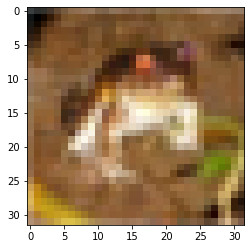

In [5]:
plt.imshow(x_train[0])

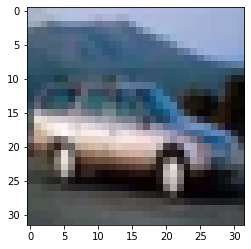

In [6]:
plt.imshow(x_train[4])

In [7]:
y_train[0]

array([6], dtype=uint8)

In [8]:
y_train[4]

array([1], dtype=uint8)

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train = to_categorical(y_train,10)

In [13]:
y_test= to_categorical(y_test,10)

In [14]:
y_train[0]# this is to_categorical work

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [16]:
x_train.shape

(50000, 32, 32, 3)

In [18]:
x_train.max() # this is normalization its happened when divided with 255

1.0

In [19]:
x_train.min()

0.0

In [22]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [47]:
from tensorflow.keras.models import Sequential

In [48]:
model=Sequential()

In [49]:
model.add(Conv2D(filters=64,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [50]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 29, 29, 64)        3136      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 32)        32800     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [53]:
model.fit(x_train,y_train,verbose=1,epochs=2)

Train on 50000 samples
Epoch 1/2
50000/50000 [==============================] - 297s 6ms/sample - loss: 1.0613 - accuracy: 0.6262
Epoch 2/2
50000/50000 [==============================] - 298s 6ms/sample - loss: 0.9655 - accuracy: 0.6621


In [55]:
from sklearn.metrics import classification_report

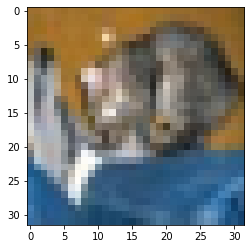

In [56]:
plt.imshow(x_test[0])

In [57]:
y_test[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [58]:
prediction=model.predict_classes(x_test)

In [59]:
y_test[2]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [60]:
prediction[2]

1

In [61]:
import numpy as np

In [62]:
y_test=np.argmax(y_test,axis=1)

In [63]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      0.19      0.32     10000
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.19     10000
   macro avg       0.10      0.02      0.03     10000
weighted avg       1.00      0.19      0.32     10000



C:\Users\abrar\.conda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
